**Анализ продаж британского e-commerce (поиск инсайтов, составление рекомендаций стейкхолдерам, построение предиктивной модели объёмов продаж)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply

In [ ]:
df = pd.read_csv('data1.csv', sep=',', header=0, na_values='?')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity       float64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df['Date']=df['InvoiceDate'].dt.normalize()

In [ ]:
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,12.0,1.0
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,12.0,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,12.0,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,12.0,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,12.0,1.0


In [ ]:
df['Year']= pd.DatetimeIndex(df.InvoiceDate).year
df['Time']=pd.DatetimeIndex(df.InvoiceDate).hour
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month,Day,Year,Time
478233,577078,21812,GARLAND WITH HEARTS AND BELLS,2.0,2011-11-17 15:17:00,3.29,NaN,United Kingdom,2011-11-17,11.0,17.0,2011.0,15.0
224215,556510,23163,REGENCY SUGAR TONGS,8.0,2011-06-13 10:36:00,2.49,14911.0,EIRE,2011-06-13,6.0,13.0,2011.0,10.0
368643,568990,23032,DRAWER KNOB CRACKLE GLAZE IVORY,6.0,2011-09-29 16:42:00,1.65,15933.0,United Kingdom,2011-09-29,9.0,29.0,2011.0,16.0
339865,566603,23174,REGENCY SUGAR BOWL GREEN,1.0,2011-09-13 16:12:00,8.29,NaN,United Kingdom,2011-09-13,9.0,13.0,2011.0,16.0
257079,559510,22356,CHARLOTTE BAG PINK POLKADOT,10.0,2011-07-08 15:29:00,0.85,14961.0,United Kingdom,2011-07-08,7.0,8.0,2011.0,15.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    535874 non-null  object        
 2   Description  534373 non-null  object        
 3   Quantity     535874 non-null  float64       
 4   InvoiceDate  535874 non-null  datetime64[ns]
 5   UnitPrice    535874 non-null  float64       
 6   CustomerID   403182 non-null  float64       
 7   Country      535874 non-null  object        
 8   Date         535874 non-null  datetime64[ns]
 9   Month        535874 non-null  float64       
 10  Day          535874 non-null  float64       
 11  Year         535874 non-null  float64       
 12  Time         535874 non-null  float64       
dtypes: datetime64[ns](2), float64(7), object(4)
memory usage: 53.7+ MB


Столбец CustomerID / Month / Year / Day / Time перевести в формат int64 пока не можем из-за пустых значений

In [ ]:
df['Description']=df.Description.str.lower()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month,Day,Year,Time
0,536365,85123A,white hanging heart t-light holder,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,12.0,1.0,2010.0,8.0
1,536365,71053,white metal lantern,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,12.0,1.0,2010.0,8.0
2,536365,84406B,cream cupid hearts coat hanger,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,12.0,1.0,2010.0,8.0
3,536365,84029G,knitted union flag hot water bottle,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,12.0,1.0,2010.0,8.0
4,536365,84029E,red woolly hottie white heart.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,12.0,1.0,2010.0,8.0


In [ ]:
df['CustomerID'].unique()

array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

Измерение ненулевых значений в столбце

In [ ]:
colstats = {}
for col in df.columns:
    colstats[col] = [df[col].isnull().sum(),df[col].isnull().sum()*100/df.shape[0],
                len(df[col].unique()),len(df[col].unique())*100/df.shape[0]] 
    
stats_col = pd.DataFrame(colstats.values(), index = colstats.keys(),  columns = ['#Null','%Null','#Unique','%Unique'])
pd.set_option('precision',2)
pd.set_option('display.float_format', lambda x: '%.1f' % x)
print(stats_col)

              #Null  %Null  #Unique  %Unique
InvoiceNo         0    0.0    31847      5.9
StockCode      6035    1.1     4000      0.7
Description    7536    1.4     4096      0.8
Quantity       6035    1.1      710      0.1
InvoiceDate    6035    1.1    23226      4.3
UnitPrice      6035    1.1     1629      0.3
CustomerID   138727   25.6     4371      0.8
Country        6035    1.1       39      0.0
Date           6035    1.1      306      0.1
Month          6035    1.1       13      0.0
Day            6035    1.1       32      0.0
Year           6035    1.1        3      0.0
Time           6035    1.1       16      0.0


Судя по приведенной выше таблице, в 25 % данных отсутствует CustomerID. 

In [ ]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     138727
Description      7536
StockCode        6035
Quantity         6035
InvoiceDate      6035
UnitPrice        6035
Country          6035
Date             6035
Month            6035
Day              6035
Year             6035
Time             6035
InvoiceNo           0
dtype: int64

Для того чтоб пустоты не потерялись перенесём их в датафрейм  df_delete

In [ ]:
df_delete = df
df_delete.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month,Day,Year,Time
0,536365,85123A,white hanging heart t-light holder,6.0,2010-12-01 08:26:00,2.5,17850.0,United Kingdom,2010-12-01,12.0,1.0,2010.0,8.0
1,536365,71053,white metal lantern,6.0,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,2010-12-01,12.0,1.0,2010.0,8.0
2,536365,84406B,cream cupid hearts coat hanger,8.0,2010-12-01 08:26:00,2.8,17850.0,United Kingdom,2010-12-01,12.0,1.0,2010.0,8.0
3,536365,84029G,knitted union flag hot water bottle,6.0,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,2010-12-01,12.0,1.0,2010.0,8.0
4,536365,84029E,red woolly hottie white heart.,6.0,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,2010-12-01,12.0,1.0,2010.0,8.0


In [ ]:
df_delete["CustomerID"].fillna('0', inplace = True)

In [ ]:
df_delete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    535874 non-null  object        
 2   Description  534373 non-null  object        
 3   Quantity     535874 non-null  float64       
 4   InvoiceDate  535874 non-null  datetime64[ns]
 5   UnitPrice    535874 non-null  float64       
 6   CustomerID   541909 non-null  object        
 7   Country      535874 non-null  object        
 8   Date         535874 non-null  datetime64[ns]
 9   Month        535874 non-null  float64       
 10  Day          535874 non-null  float64       
 11  Year         535874 non-null  float64       
 12  Time         535874 non-null  float64       
dtypes: datetime64[ns](2), float64(6), object(5)
memory usage: 53.7+ MB


In [ ]:
df_delete = df_delete.loc[df_delete['CustomerID'] == '0']
df_delete.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month,Day,Year,Time
109,"536381,82567,""AIRLINE LOUNGE,METAL SIGN"",2,12/...",NaN,NaN,NaN,NaT,NaN,0,NaN,NaT,NaN,NaN,NaN,NaN
253,"536394,21506,""FANCY FONT BIRTHDAY CARD, "",24,1...",NaN,NaN,NaN,NaT,NaN,0,NaN,NaT,NaN,NaN,NaN,NaN
622,536414,22139,NaN,56.0,2010-12-01 11:52:00,0.0,0,United Kingdom,2010-12-01,12.0,1.0,2010.0,11.0
871,"536477,22041,""RECORD FRAME 7"""" SINGLE SIZE "",4...",NaN,NaN,NaN,NaT,NaN,0,NaN,NaT,NaN,NaN,NaN,NaN
956,"536520,22760,""TRAY, BREAKFAST IN BED"",1,12/1/2...",NaN,NaN,NaN,NaT,NaN,0,NaN,NaT,NaN,NaN,NaN,NaN


In [ ]:
df_delete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138727 entries, 109 to 541787
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    138727 non-null  object        
 1   StockCode    132692 non-null  object        
 2   Description  131191 non-null  object        
 3   Quantity     132692 non-null  float64       
 4   InvoiceDate  132692 non-null  datetime64[ns]
 5   UnitPrice    132692 non-null  float64       
 6   CustomerID   138727 non-null  object        
 7   Country      132692 non-null  object        
 8   Date         132692 non-null  datetime64[ns]
 9   Month        132692 non-null  float64       
 10  Day          132692 non-null  float64       
 11  Year         132692 non-null  float64       
 12  Time         132692 non-null  float64       
dtypes: datetime64[ns](2), float64(6), object(5)
memory usage: 14.8+ MB


Пустые значения сохранены

Для дальнейшего анализа строки с отсутствующими значениями будут удалены

In [ ]:
df_new=df.dropna()
df_new.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month,Day,Year,Time
0,536365,85123A,white hanging heart t-light holder,6.0,2010-12-01 08:26:00,2.5,17850.0,United Kingdom,2010-12-01,12.0,1.0,2010.0,8.0
1,536365,71053,white metal lantern,6.0,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,2010-12-01,12.0,1.0,2010.0,8.0
2,536365,84406B,cream cupid hearts coat hanger,8.0,2010-12-01 08:26:00,2.8,17850.0,United Kingdom,2010-12-01,12.0,1.0,2010.0,8.0
3,536365,84029G,knitted union flag hot water bottle,6.0,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,2010-12-01,12.0,1.0,2010.0,8.0
4,536365,84029E,red woolly hottie white heart.,6.0,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,2010-12-01,12.0,1.0,2010.0,8.0


In [ ]:
df_new.isnull().sum().sort_values(ascending=False)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Date           0
Month          0
Day            0
Year           0
Time           0
dtype: int64

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534373 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    534373 non-null  object        
 1   StockCode    534373 non-null  object        
 2   Description  534373 non-null  object        
 3   Quantity     534373 non-null  float64       
 4   InvoiceDate  534373 non-null  datetime64[ns]
 5   UnitPrice    534373 non-null  float64       
 6   CustomerID   534373 non-null  object        
 7   Country      534373 non-null  object        
 8   Date         534373 non-null  datetime64[ns]
 9   Month        534373 non-null  float64       
 10  Day          534373 non-null  float64       
 11  Year         534373 non-null  float64       
 12  Time         534373 non-null  float64       
dtypes: datetime64[ns](2), float64(6), object(5)
memory usage: 57.1+ MB


Теперь нет пустых значений

- Обрабатываем дубли

In [ ]:
df_new[df_new.duplicated()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month,Day,Year,Time
517,536409,21866,union jack flag luggage tag,1.0,2010-12-01 11:45:00,1.2,17908.0,United Kingdom,2010-12-01,12.0,1.0,2010.0,11.0
527,536409,22866,hand warmer scotty dog design,1.0,2010-12-01 11:45:00,2.1,17908.0,United Kingdom,2010-12-01,12.0,1.0,2010.0,11.0
537,536409,22900,set 2 tea towels i love london,1.0,2010-12-01 11:45:00,3.0,17908.0,United Kingdom,2010-12-01,12.0,1.0,2010.0,11.0
539,536409,22111,scottie dog hot water bottle,1.0,2010-12-01 11:45:00,5.0,17908.0,United Kingdom,2010-12-01,12.0,1.0,2010.0,11.0
555,536412,22327,round snack boxes set of 4 skulls,1.0,2010-12-01 11:49:00,3.0,17920.0,United Kingdom,2010-12-01,12.0,1.0,2010.0,11.0


In [ ]:
df_new.duplicated().sum()

5222

5222 дублирующихся транзакций.

In [ ]:
df_new.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df_new.duplicated().sum()

0

Дубли удалены

Теперь можем необходимые столбы перевести в нужный формат 

In [ ]:
df_new['CustomerID']=df_new.CustomerID.astype('int64')
df_new['Time']=df_new.Time.astype('int64')
df_new['Month']=df_new.Month.astype('int64')
df_new['Year']=df_new.Year.astype('int64')
df_new['Day']=df_new.Day.astype('int64')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529151 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    529151 non-null  object        
 1   StockCode    529151 non-null  object        
 2   Description  529151 non-null  object        
 3   Quantity     529151 non-null  float64       
 4   InvoiceDate  529151 non-null  datetime64[ns]
 5   UnitPrice    529151 non-null  float64       
 6   CustomerID   529151 non-null  int64         
 7   Country      529151 non-null  object        
 8   Date         529151 non-null  datetime64[ns]
 9   Month        529151 non-null  int64         
 10  Day          529151 non-null  int64         
 11  Year         529151 non-null  int64         
 12  Time         529151 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(5), object(4)
memory usage: 56.5+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month,Day,Year,Time
0,536365,85123A,white hanging heart t-light holder,6.0,2010-12-01 08:26:00,2.5,17850,United Kingdom,2010-12-01,12,1,2010,8
1,536365,71053,white metal lantern,6.0,2010-12-01 08:26:00,3.4,17850,United Kingdom,2010-12-01,12,1,2010,8
2,536365,84406B,cream cupid hearts coat hanger,8.0,2010-12-01 08:26:00,2.8,17850,United Kingdom,2010-12-01,12,1,2010,8
3,536365,84029G,knitted union flag hot water bottle,6.0,2010-12-01 08:26:00,3.4,17850,United Kingdom,2010-12-01,12,1,2010,8
4,536365,84029E,red woolly hottie white heart.,6.0,2010-12-01 08:26:00,3.4,17850,United Kingdom,2010-12-01,12,1,2010,8


Создаём дополнительные признаки.

In [ ]:
df_new['Amount_spent']=df_new['Quantity'] * df_new['UnitPrice']
df_new['Daymonth']=df_new['Day'].astype(str)+'-'+df_new['Month'].astype(str)
df_new['Monthyear']=df_new['Month'].astype(str)+'-'+df_new['Year'].astype(str)
df_new.sample(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month,Day,Year,Time,Amount_spent,Daymonth,Monthyear
452233,575329,82552,washroom metal sign,2.0,2011-11-09 13:50:00,1.4,17038,United Kingdom,2011-11-09,11,9,2011,13,2.9,9-11,11-2011
267199,560290,22502,picnic basket wicker small,2.0,2011-07-18 10:17:00,10.8,0,United Kingdom,2011-07-18,7,18,2011,10,21.6,18-7,7-2011
222837,556459,23200,jumbo bag pears,4.0,2011-06-10 17:25:00,4.1,0,United Kingdom,2011-06-10,6,10,2011,17,16.5,10-6,6-2011
45742,540278,22562,monsters stencil craft,1.0,2011-01-06 12:31:00,1.2,15719,United Kingdom,2011-01-06,1,6,2011,12,1.2,6-1,1-2011
510580,579458,20685,doormat red retrospot,1.0,2011-11-29 14:38:00,8.2,16549,United Kingdom,2011-11-29,11,29,2011,14,8.2,29-11,11-2011


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529151 entries, 0 to 541908
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     529151 non-null  object        
 1   StockCode     529151 non-null  object        
 2   Description   529151 non-null  object        
 3   Quantity      529151 non-null  float64       
 4   InvoiceDate   529151 non-null  datetime64[ns]
 5   UnitPrice     529151 non-null  float64       
 6   CustomerID    529151 non-null  int64         
 7   Country       529151 non-null  object        
 8   Date          529151 non-null  datetime64[ns]
 9   Month         529151 non-null  int64         
 10  Day           529151 non-null  int64         
 11  Year          529151 non-null  int64         
 12  Time          529151 non-null  int64         
 13  Amount_spent  529151 non-null  float64       
 14  Daymonth      529151 non-null  object        
 15  Monthyear     529

Смотрим описательную статистику через комманду describe 


In [ ]:
df_new.describe()

,Quantity,UnitPrice,CustomerID,Month,Day,Year,Time,Amount_spent
count,529151.0,529151.0,529151.0,529151.0,529151.0,529151.0,529151.0,529151.0
mean,9.7,4.7,11493.8,7.6,15.0,2010.9,13.1,18.3
std,153.5,97.9,6763.3,3.5,8.7,0.3,2.4,199.2
min,-74215.0,-11062.1,0.0,1.0,1.0,2010.0,6.0,-77183.6
25%,1.0,1.2,12362.0,5.0,7.0,2011.0,11.0,3.8
50%,3.0,2.1,14367.0,8.0,15.0,2011.0,13.0,9.9
75%,10.0,4.1,16250.0,11.0,22.0,2011.0,15.0,17.7
max,74215.0,38970.0,18287.0,12.0,31.0,2011.0,20.0,77183.6


Quantity имеет отрицательные значения, а цена за единицу имеет минимальное значение 0

In [ ]:
np.sum(df_new['Quantity'] < 0)

9606

Есть  транзакции с отрицательным количеством. Мы проверим, связаны ли они с отмененными заказами или ошибками.

**Анализ отменённых заказов**

In [ ]:
canceled_orders = df_new[df_new['InvoiceNo'].apply(lambda x: x[0]=='C')]
canceled_orders.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month,Day,Year,Time,Amount_spent,Daymonth,Monthyear
141,C536379,D,discount,-1.0,2010-12-01 09:41:00,27.5,14527,United Kingdom,2010-12-01,12,1,2010,9,-27.5,1-12,12-2010
154,C536383,35004C,set of 3 coloured flying ducks,-1.0,2010-12-01 09:49:00,4.7,15311,United Kingdom,2010-12-01,12,1,2010,9,-4.7,1-12,12-2010
235,C536391,22556,plasters in tin circus parade,-12.0,2010-12-01 10:24:00,1.6,17548,United Kingdom,2010-12-01,12,1,2010,10,-19.8,1-12,12-2010
236,C536391,21984,pack of 12 pink paisley tissues,-24.0,2010-12-01 10:24:00,0.3,17548,United Kingdom,2010-12-01,12,1,2010,10,-7.0,1-12,12-2010
237,C536391,21983,pack of 12 blue paisley tissues,-24.0,2010-12-01 10:24:00,0.3,17548,United Kingdom,2010-12-01,12,1,2010,10,-7.0,1-12,12-2010


Анализируя первые 5 значений фрейма данных, мы видим, что количество имеет отрицательные значения, верно ли это для всех отмененных заказов?

In [ ]:
(canceled_orders['Quantity'] < 0).sum()

9185

Как и ожидалось, транзакции с отрицательными значениями являются отмененными ордерами.

In [ ]:
print('Процент отмененных заказов составляет: {} %'.format(round(canceled_orders.shape[0]/df_new.shape[0]*100,2)))

Процент отмененных заказов составляет: 1.74 %


Более того, похоже, что среди отмененных заказов есть какие-то скидки. 

**Скидки**

In [ ]:
discounts = df_new[df_new['StockCode'].apply(lambda order: order=='D')]
discounts.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month,Day,Year,Time,Amount_spent,Daymonth,Monthyear
141,C536379,D,discount,-1.0,2010-12-01 09:41:00,27.5,14527,United Kingdom,2010-12-01,12,1,2010,9,-27.5,1-12,12-2010
9038,C537164,D,discount,-1.0,2010-12-05 13:21:00,29.3,14527,United Kingdom,2010-12-05,12,5,2010,13,-29.3,5-12,12-2010
14498,C537597,D,discount,-1.0,2010-12-07 12:34:00,281.0,15498,United Kingdom,2010-12-07,12,7,2010,12,-281.0,7-12,12-2010
19392,C537857,D,discount,-1.0,2010-12-08 16:00:00,267.1,17340,United Kingdom,2010-12-08,12,8,2010,16,-267.1,8-12,12-2010
31134,C538897,D,discount,-1.0,2010-12-15 09:14:00,5.8,16422,United Kingdom,2010-12-15,12,15,2010,9,-5.8,15-12,12-2010


In [ ]:
discounts.shape

(77, 16)

Было 77 скидок. Нужно преверить есть ли ещё скидки в исходнике

In [ ]:
df[df['StockCode'].apply(lambda order: order=='D')].shape[0]

77

Нет. Теперь все отменённые заказы можно удалить

In [ ]:
df_new = df_new[df_new['Quantity'] > 0]
df_new.sort_values(by='StockCode', ascending=False, inplace=True)
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month,Day,Year,Time,Amount_spent,Daymonth,Monthyear
40383,539736,m,manual,1.0,2010-12-21 15:18:00,2.5,0,United Kingdom,2010-12-21,12,21,2010,15,2.5,21-12,12-2010
42057,539958,gift_0001_50,dotcomgiftshop gift voucher ј50.00,1.0,2010-12-23 13:26:00,42.5,0,United Kingdom,2010-12-23,12,23,2010,13,42.5,23-12,12-2010
245516,558614,gift_0001_50,dotcomgiftshop gift voucher ј50.00,1.0,2011-06-30 15:56:00,41.7,0,United Kingdom,2011-06-30,6,30,2011,15,41.7,30-6,6-2011
178556,552232,gift_0001_50,dotcomgiftshop gift voucher ј50.00,1.0,2011-05-06 15:54:00,41.7,0,United Kingdom,2011-05-06,5,6,2011,15,41.7,6-5,5-2011
239744,558066,gift_0001_50,dotcomgiftshop gift voucher ј50.00,1.0,2011-06-24 15:45:00,41.7,0,United Kingdom,2011-06-24,6,24,2011,15,41.7,24-6,6-2011


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519545 entries, 40383 to 21331
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     519545 non-null  object        
 1   StockCode     519545 non-null  object        
 2   Description   519545 non-null  object        
 3   Quantity      519545 non-null  float64       
 4   InvoiceDate   519545 non-null  datetime64[ns]
 5   UnitPrice     519545 non-null  float64       
 6   CustomerID    519545 non-null  int64         
 7   Country       519545 non-null  object        
 8   Date          519545 non-null  datetime64[ns]
 9   Month         519545 non-null  int64         
 10  Day           519545 non-null  int64         
 11  Year          519545 non-null  int64         
 12  Time          519545 non-null  int64         
 13  Amount_spent  519545 non-null  float64       
 14  Daymonth      519545 non-null  object        
 15  Monthyear     

**Проверяем транзакции товаров**

Наличие специальных элементов будем проверяться с помощью регулярного выражения

In [ ]:
import re
spec_list=[]
for code in df_new.StockCode:
    x=re.findall(r"^\w{1}$|\D[A-Z]+\D|[A-Z]\d", code)
    if x not in spec_list:
        if len(x) >0 :
            spec_list.append(x)
spec_list

[['m'],
 ['S'],
 ['POST'],
 ['PADS'],
 ['M'],
 ['DOT'],
 ['DCGSSGIRL'],
 ['DCGSSBOY'],
 ['DCGS'],
 ['C2'],
 ['BANK ', 'CHARGES'],
 ['B'],
 ['AMAZONFEE']]

['BANK ', 'CHARGES']будет переименован в ['BANK CHARGES']:



In [ ]:
spec_list[5] = ['BANK CHARGES']

Затем spec_list будет преобразован в единый список:

In [ ]:
spec_list2=[item for sublist in spec_list for item in sublist]
spec_list2

['m',
 'S',
 'POST',
 'PADS',
 'M',
 'BANK CHARGES',
 'DCGSSGIRL',
 'DCGSSBOY',
 'DCGS',
 'C2',
 'BANK ',
 'CHARGES',
 'B',
 'AMAZONFEE']

Теперь можно проверить все транзакции, связанные с этими специальными предметами

In [ ]:
df_new[df_new['StockCode'].apply(lambda x: x in spec_list2)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month,Day,Year,Time,Amount_spent,Daymonth,Monthyear
40383,539736,m,manual,1.0,2010-12-21 15:18:00,2.5,0,United Kingdom,2010-12-21,12,21,2010,15,2.5,21-12,12-2010
419666,572849,S,samples,1.0,2011-10-26 12:20:00,33.0,0,United Kingdom,2011-10-26,10,26,2011,12,33.0,26-10,10-2011
152709,549684,S,samples,1.0,2011-04-11 13:24:00,30.0,0,United Kingdom,2011-04-11,4,11,2011,13,30.0,11-4,4-2011
201789,554324,POST,postage,1.0,2011-05-23 15:38:00,18.0,12712,Germany,2011-05-23,5,23,2011,15,18.0,23-5,5-2011
200833,554159,POST,postage,2.0,2011-05-23 11:48:00,15.0,12464,Belgium,2011-05-23,5,23,2011,11,30.0,23-5,5-2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299982,A563185,B,adjust bad debt,1.0,2011-08-12 14:50:00,11062.1,0,United Kingdom,2011-08-12,8,12,2011,14,11062.1,12-8,8-2011
299983,A563186,B,adjust bad debt,1.0,2011-08-12 14:51:00,-11062.1,0,United Kingdom,2011-08-12,8,12,2011,14,-11062.1,12-8,8-2011
299984,A563187,B,adjust bad debt,1.0,2011-08-12 14:52:00,-11062.1,0,United Kingdom,2011-08-12,8,12,2011,14,-11062.1,12-8,8-2011
15017,537632,AMAZONFEE,amazon fee,1.0,2010-12-07 15:08:00,13541.3,0,United Kingdom,2010-12-07,12,7,2010,15,13541.3,7-12,12-2010


В набор данных включены и другие типы транзакций. Они будут сброшены.
Специальные переводы: POST (почтовые расходы), M (ручные), банковские сборы и C2 (перевозка).

In [ ]:
df_new = df_new[~df_new['StockCode'].isin(spec_list2)]
df_new.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month,Day,Year,Time,Amount_spent,Daymonth,Monthyear
42057,539958,gift_0001_50,dotcomgiftshop gift voucher ј50.00,1.0,2010-12-23 13:26:00,42.5,0,United Kingdom,2010-12-23,12,23,2010,13,42.5,23-12,12-2010
245516,558614,gift_0001_50,dotcomgiftshop gift voucher ј50.00,1.0,2011-06-30 15:56:00,41.7,0,United Kingdom,2011-06-30,6,30,2011,15,41.7,30-6,6-2011
178556,552232,gift_0001_50,dotcomgiftshop gift voucher ј50.00,1.0,2011-05-06 15:54:00,41.7,0,United Kingdom,2011-05-06,5,6,2011,15,41.7,6-5,5-2011
239744,558066,gift_0001_50,dotcomgiftshop gift voucher ј50.00,1.0,2011-06-24 15:45:00,41.7,0,United Kingdom,2011-06-24,6,24,2011,15,41.7,24-6,6-2011
38248,539492,gift_0001_40,dotcomgiftshop gift voucher ј40.00,1.0,2010-12-20 10:14:00,34.0,0,United Kingdom,2010-12-20,12,20,2010,10,34.0,20-12,12-2010


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517908 entries, 42057 to 21331
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     517908 non-null  object        
 1   StockCode     517908 non-null  object        
 2   Description   517908 non-null  object        
 3   Quantity      517908 non-null  float64       
 4   InvoiceDate   517908 non-null  datetime64[ns]
 5   UnitPrice     517908 non-null  float64       
 6   CustomerID    517908 non-null  int64         
 7   Country       517908 non-null  object        
 8   Date          517908 non-null  datetime64[ns]
 9   Month         517908 non-null  int64         
 10  Day           517908 non-null  int64         
 11  Year          517908 non-null  int64         
 12  Time          517908 non-null  int64         
 13  Amount_spent  517908 non-null  float64       
 14  Daymonth      517908 non-null  object        
 15  Monthyear     

После того как выборка чистая можем посмотреть корректное кол-вл заказов по странам и стоимость заказов по странам

**Анализ**

,sum
Country,
United Kingdom,4539213.0
Netherlands,199046.0
EIRE,145034.0
Germany,117409.0
France,110835.0


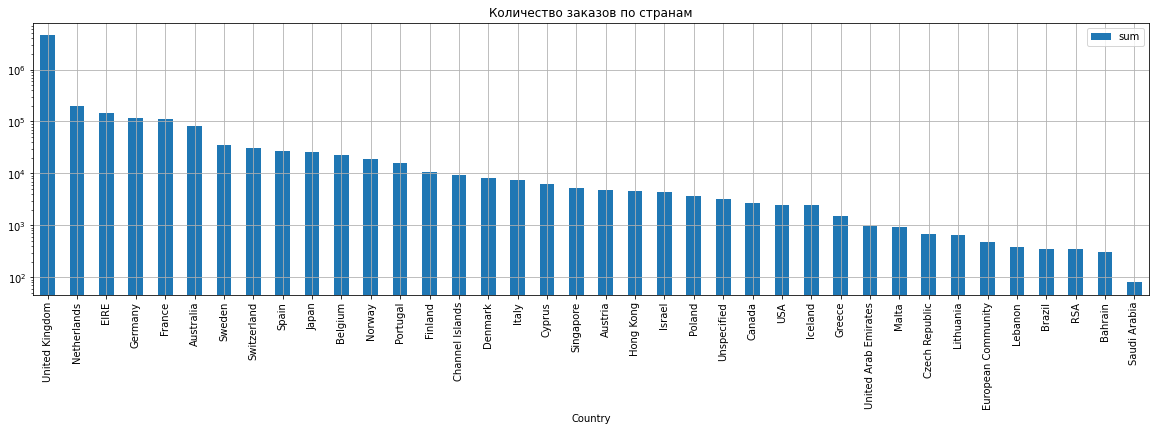

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(20,5))
stats_country = df_new.groupby(['Country']).Quantity.agg([np.sum])
stats_country.sort_values(by='sum',ascending=False).plot(kind='bar',ax=ax).set_title('Количество заказов по странам')
plt.yscale("log")
plt.grid()

stats_country.sort_values(by='sum',ascending=False).head()

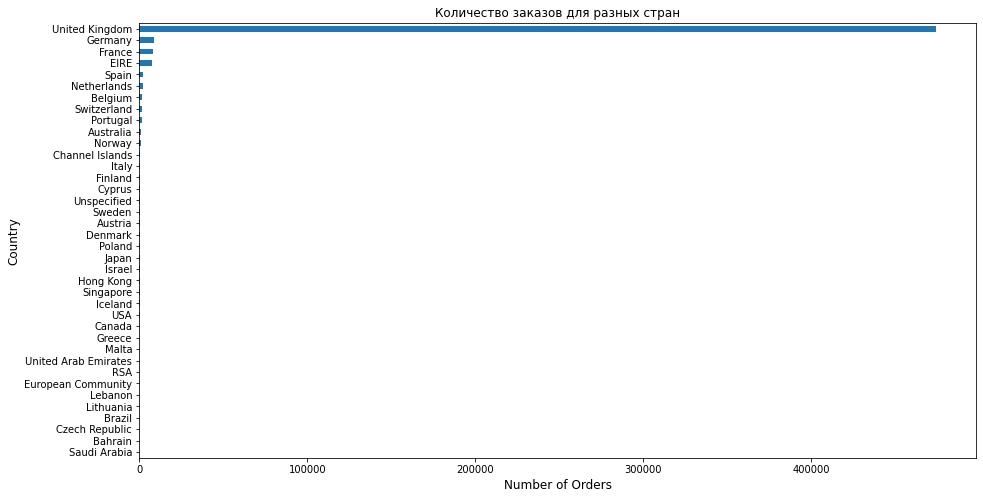

In [ ]:
group_country_orders = df_new.groupby('Country')['InvoiceNo'].count().sort_values()

plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Количество заказов для разных стран', fontsize=12)
plt.show()

Компания базируется в Великобритании, поэтому кажется естественным, что страной с наибольшим количеством продаваемых товаров является Великобритания.
Для дальнейшего анализа Великобритания будет отброшена

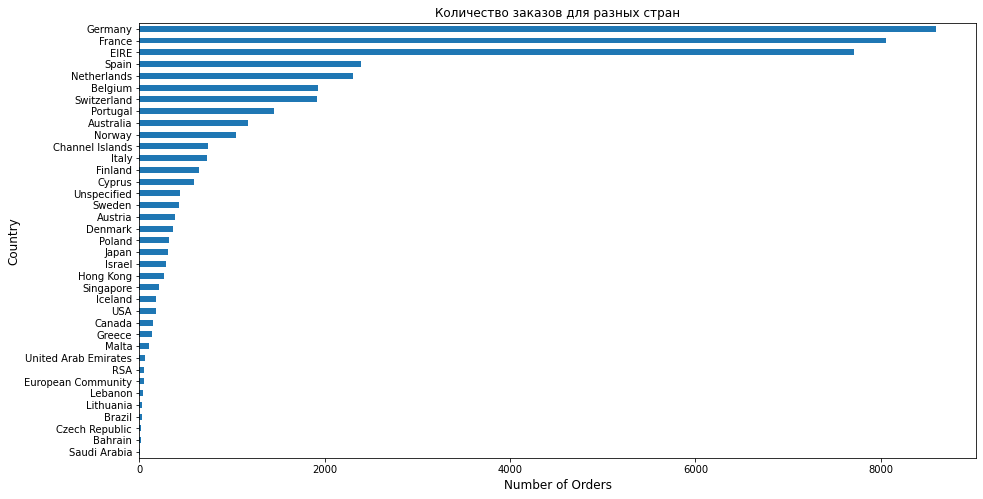

In [ ]:
group_country_orders = df_new.groupby('Country')['InvoiceNo'].count().sort_values()
del group_country_orders['United Kingdom']

plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Количество заказов для разных стран', fontsize=12)
plt.show()

За исключением Соединенного Королевства, Германия, Франция и Ирландия являются тремя странами, где клиенты потратили больше всего денег.

- Сколько денег потрачено каждой страной?

,sum,mean
Country,,
Netherlands,282466.9,122.3
Japan,36691.8,117.2
Australia,136320.2,116.0
Sweden,36607.1,86.3
Denmark,18108.4,49.9


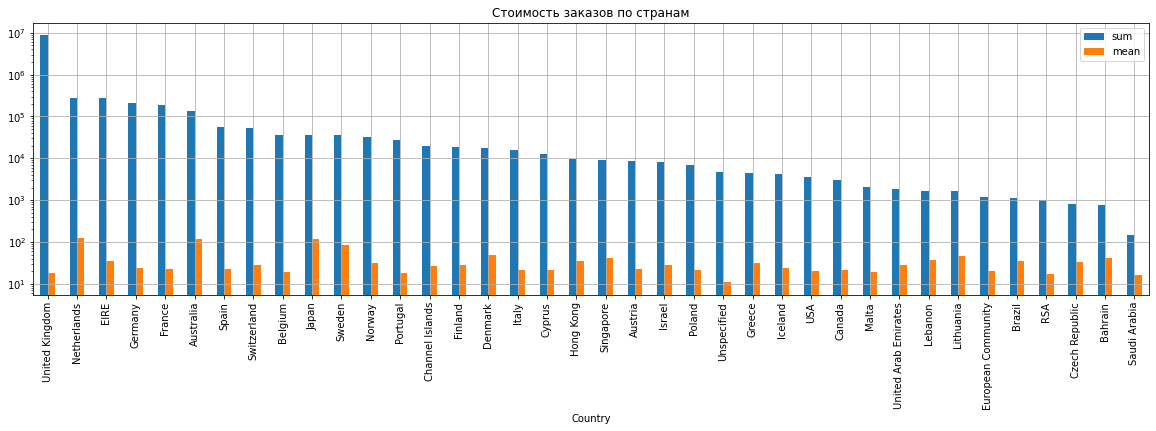

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(20,5))
temp = df_new.copy()
temp['Value'] = temp['Quantity']*temp['UnitPrice']
stats_country = temp.groupby(['Country']).Value.agg([np.sum, np.mean])
stats_country.sort_values(by='sum',ascending=False).plot(kind='bar',ax=ax).set_title('Стоимость заказов по странам')
plt.yscale("log")
plt.grid()

stats_country.sort_values(by='mean',ascending=False).head()

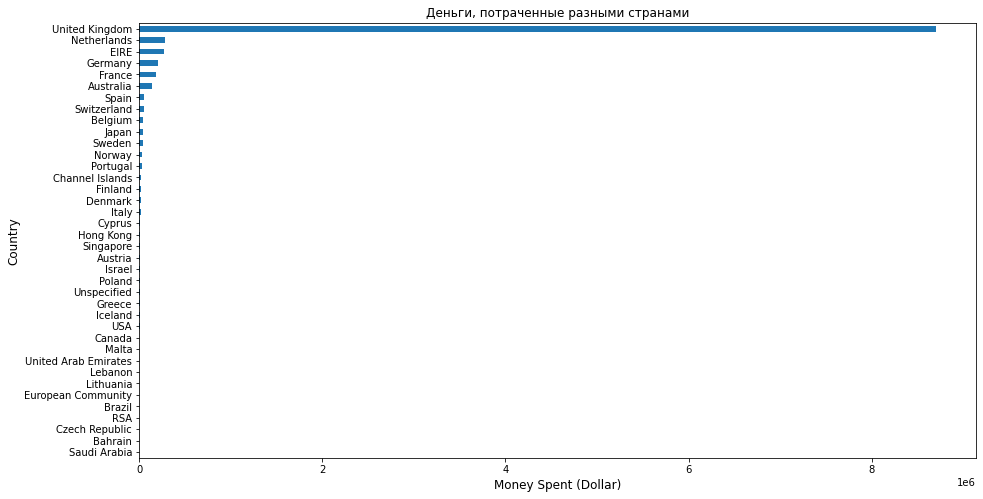

In [ ]:
group_country_amount_spent = df_new.groupby('Country')['Amount_spent'].sum().sort_values()

plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh')
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Деньги, потраченные разными странами', fontsize=12)
plt.show()

По той же причине, что и выше, мы исключим Великобританию для этого анализа.

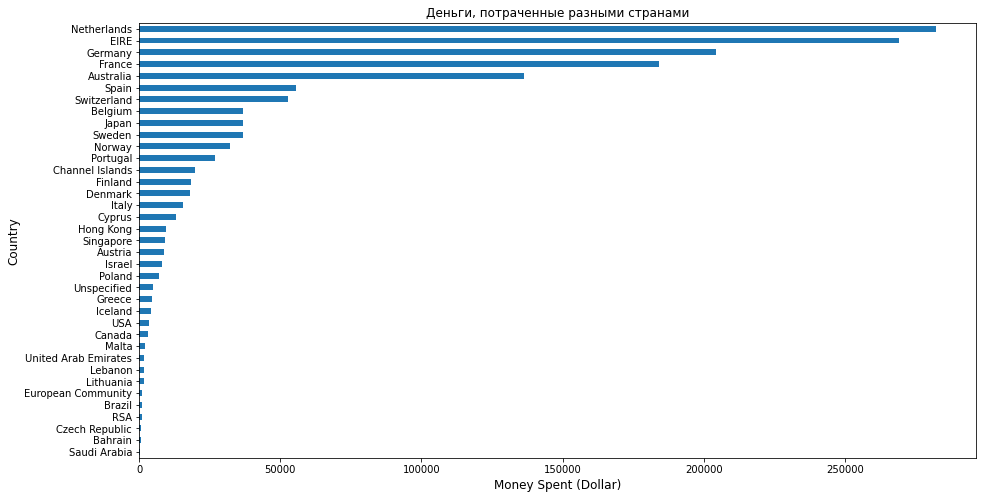

In [ ]:
group_country_amount_spent = df_new.groupby('Country')['Amount_spent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh')
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Деньги, потраченные разными странами', fontsize=12)
plt.show()

За исключением Великобритании, больше всего денег на веб-сайте потратили клиенты из Нидерландов, Ирландии, Германии, Франции и Австралии.

Какие продукты продаются больше всего?

In [ ]:
most_sold_products=df_new.groupby(by=['StockCode','Description'])['Quantity'].sum().sort_values(ascending=False).iloc[:50]
df_top_prod=most_sold_products.to_frame().reset_index()
df_top_prod.head()

,StockCode,Description,Quantity
0,23166,medium ceramic top storage jar,78033.0
1,84077,world war 2 gliders asstd designs,54951.0
2,85099B,jumbo bag red retrospot,48375.0
3,85123A,white hanging heart t-light holder,37584.0
4,22197,popcorn holder,36749.0


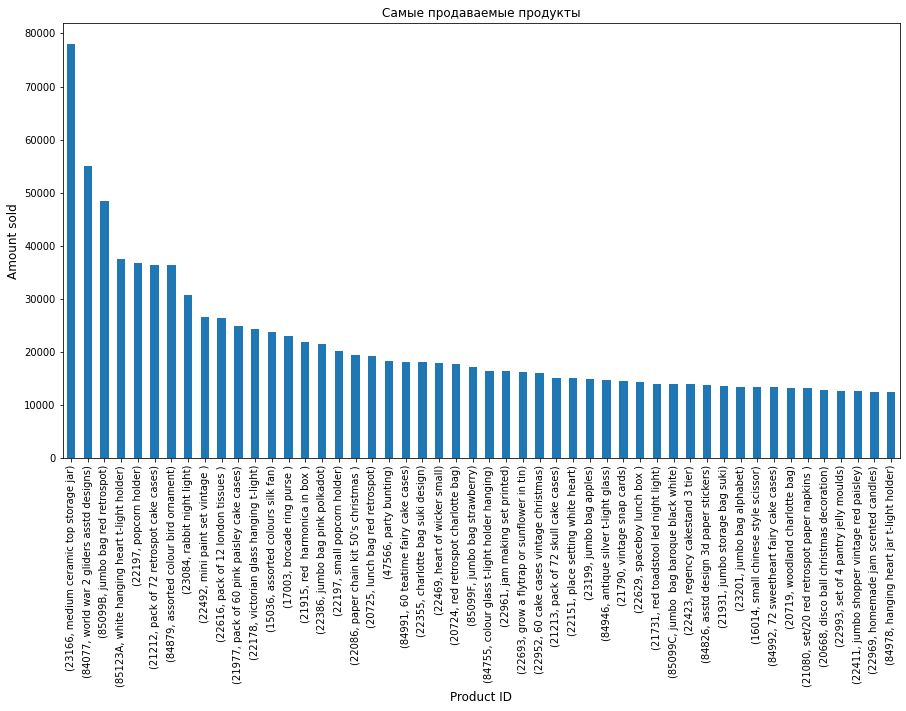

In [ ]:
plt.subplots(figsize=(15,8))
most_sold_products.plot(kind='bar')
plt.xlabel('Product ID', fontsize=12)
plt.ylabel('Amount sold', fontsize=12)
plt.title('Самые продаваемые продукты', fontsize=12)
plt.show()

Самые прибыльные продукты

In [ ]:
most_profitable_product = df_new.groupby(by=['StockCode','Description'])['Amount_spent'].sum().sort_values(ascending=False).iloc[:50]
df_prof_prod = most_profitable_product.to_frame().reset_index().head()
df_prof_prod.head()

,StockCode,Description,Amount_spent
0,DOT,dotcom postage,206248.8
1,22423,regency cakestand 3 tier,174156.5
2,85123A,white hanging heart t-light holder,104284.2
3,47566,party bunting,99445.2
4,85099B,jumbo bag red retrospot,94159.8


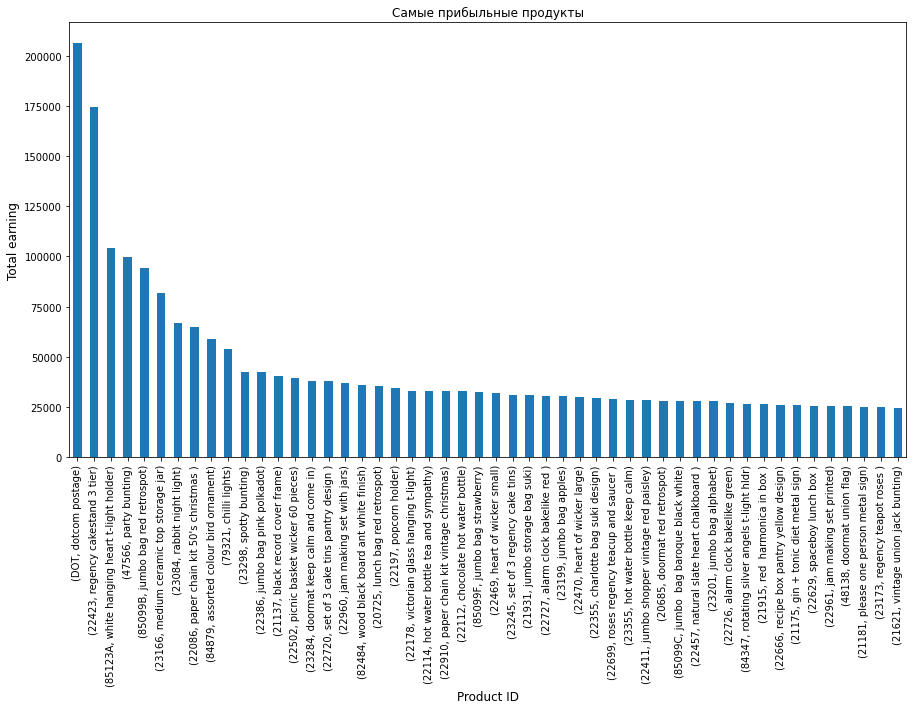

In [ ]:
plt.subplots(figsize=(15,8))
most_profitable_product.plot(kind='bar')
plt.xlabel('Product ID', fontsize=12)
plt.ylabel('Total earning', fontsize=12)
plt.title('Самые прибыльные продукты', fontsize=12)
plt.show()

**Анализ самых продаваемых продуктов**

In [ ]:
df_top_prod.head()

,StockCode,Description,Quantity
0,23166,medium ceramic top storage jar,78033.0
1,84077,world war 2 gliders asstd designs,54951.0
2,85099B,jumbo bag red retrospot,48375.0
3,85123A,white hanging heart t-light holder,37584.0
4,22197,popcorn holder,36749.0


В этом фрейме данных количество представляет собой сумму всех проданных количеств для каждого продукта. Нам нужны все отдельные транзакции, связанные с топовыми продуктами.

In [ ]:
df_top_50 = df_new[df_new['Description'].isin(df_top_prod['Description'])]
df_top_50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44849 entries, 406609 to 375188
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   InvoiceNo     44849 non-null  object        
 1   StockCode     44849 non-null  object        
 2   Description   44849 non-null  object        
 3   Quantity      44849 non-null  float64       
 4   InvoiceDate   44849 non-null  datetime64[ns]
 5   UnitPrice     44849 non-null  float64       
 6   CustomerID    44849 non-null  int64         
 7   Country       44849 non-null  object        
 8   Date          44849 non-null  datetime64[ns]
 9   Month         44849 non-null  int64         
 10  Day           44849 non-null  int64         
 11  Year          44849 non-null  int64         
 12  Time          44849 non-null  int64         
 13  Amount_spent  44849 non-null  float64       
 14  Daymonth      44849 non-null  object        
 15  Monthyear     44849 non-null  

In [ ]:
df_top_50.StockCode.value_counts()

85123A    2248
85099B    2112
22423     2009
47566     1700
20725     1581
84879     1476
22197     1418
21212     1352
22386     1232
22469     1219
21931     1194
22086     1184
22411     1180
22961     1164
22993     1090
20724     1049
22178     1041
23084     1017
21080     1006
23199      986
85099C     943
21790      935
23201      911
22629      905
22355      890
21977      880
21731      855
84991      844
20719      842
85099F     819
84978      733
84946      692
21213      671
21915      664
22969      646
22952      632
84992      630
84755      622
84077      536
22616      524
15036      519
22492      380
22151      339
22693      305
23166      250
17003      241
20668      218
85123a      67
16014       54
84826       34
85099f      10
Name: StockCode, dtype: int64

Действительно, существует множество сделок, связанных с самыми продаваемыми продуктами

In [ ]:
df_top_50[df_top_50['StockCode'].isin(df_prof_prod.StockCode)].StockCode.value_counts()

85123A    2248
85099B    2112
22423     2009
47566     1700
Name: StockCode, dtype: int64

Топ-4 самых прибыльных продуктов с числом транзакций выше 1000, имеют "товарный код" : 85123A, 85099B, 22423, 47566

In [ ]:
df_top1 = df_new[df_new['StockCode'] == '85123A']
df_top2 = df_new[df_new['StockCode'] == '85099B']
df_top3 = df_new[df_new['StockCode'] == '22423']

In [ ]:
df_top1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2257 entries, 301743 to 373414
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   InvoiceNo     2257 non-null   object        
 1   StockCode     2257 non-null   object        
 2   Description   2257 non-null   object        
 3   Quantity      2257 non-null   float64       
 4   InvoiceDate   2257 non-null   datetime64[ns]
 5   UnitPrice     2257 non-null   float64       
 6   CustomerID    2257 non-null   int64         
 7   Country       2257 non-null   object        
 8   Date          2257 non-null   datetime64[ns]
 9   Month         2257 non-null   int64         
 10  Day           2257 non-null   int64         
 11  Year          2257 non-null   int64         
 12  Time          2257 non-null   int64         
 13  Amount_spent  2257 non-null   float64       
 14  Daymonth      2257 non-null   object        
 15  Monthyear     2257 non-null   o

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Продажи в месяц для наиболее продаваемого продукта')

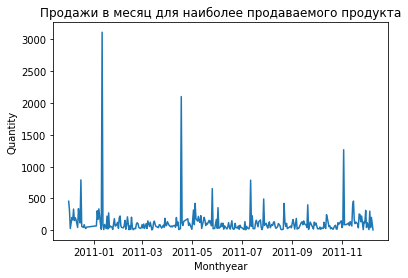

In [ ]:
df_top1['Monthyear'] = df_top1.InvoiceDate.dt.date

sales_per_purch_date = df_top1.groupby('Monthyear', as_index=False).Quantity.sum()
ax = sns.lineplot(x="Monthyear", y="Quantity", data=sales_per_purch_date)
ax.set_title('Продажи в месяц для наиболее продаваемого продукта')

Есть некоторые пики в количестве проданных этих продуктов.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Продажи в месяц для наиболее продаваемого продукта')

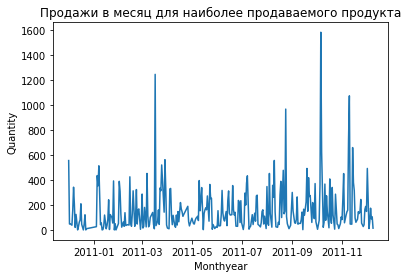

In [ ]:
df_top2['Monthyear'] = df_top2.InvoiceDate.dt.date

sales_per_purch_date = df_top2.groupby('Monthyear', as_index=False).Quantity.sum()
ax = sns.lineplot(x="Monthyear", y="Quantity", data=sales_per_purch_date)
ax.set_title('Продажи в месяц для наиболее продаваемого продукта')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Продажи в месяц для наиболее продаваемого продукта')

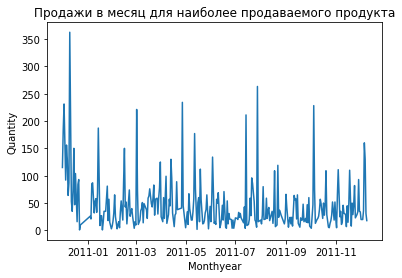

In [ ]:
df_top3['Monthyear'] = df_top3.InvoiceDate.dt.date

sales_per_purch_date = df_top3.groupby('Monthyear', as_index=False).Quantity.sum()
ax = sns.lineplot(x="Monthyear", y="Quantity", data=sales_per_purch_date)
ax.set_title('Продажи в месяц для наиболее продаваемого продукта')

Эти графики не показывают четкой закономерности в данных.

Построение модели финансового состояния магазина.

- Для начала создаём новый датафрейм (назовём его df_new_2) так как потребуются нам не все столбцы то их можно отсеять и сгруппировать данные так как нам требуется

In [ ]:
df_new_2 = df_new
df_new_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517908 entries, 42057 to 21331
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     517908 non-null  object        
 1   StockCode     517908 non-null  object        
 2   Description   517908 non-null  object        
 3   Quantity      517908 non-null  float64       
 4   InvoiceDate   517908 non-null  datetime64[ns]
 5   UnitPrice     517908 non-null  float64       
 6   CustomerID    517908 non-null  int64         
 7   Country       517908 non-null  object        
 8   Date          517908 non-null  datetime64[ns]
 9   Month         517908 non-null  int64         
 10  Day           517908 non-null  int64         
 11  Year          517908 non-null  int64         
 12  Time          517908 non-null  int64         
 13  Amount_spent  517908 non-null  float64       
 14  Daymonth      517908 non-null  object        
 15  Monthyear     

In [ ]:
df_new_2 ['Revenue']=df_new_2['Quantity']*df_new_2['UnitPrice']
df_new_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517908 entries, 42057 to 21331
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     517908 non-null  object        
 1   StockCode     517908 non-null  object        
 2   Description   517908 non-null  object        
 3   Quantity      517908 non-null  float64       
 4   InvoiceDate   517908 non-null  datetime64[ns]
 5   UnitPrice     517908 non-null  float64       
 6   CustomerID    517908 non-null  int64         
 7   Country       517908 non-null  object        
 8   Date          517908 non-null  datetime64[ns]
 9   Month         517908 non-null  int64         
 10  Day           517908 non-null  int64         
 11  Year          517908 non-null  int64         
 12  Time          517908 non-null  int64         
 13  Amount_spent  517908 non-null  float64       
 14  Daymonth      517908 non-null  object        
 15  Monthyear     

- Группируем данные

In [ ]:
df_new_2=df_new_2.groupby(by=['Year', 'Month']).sum('Revenue').reset_index()
df_new_2= df_new_2[[ 'Month','Year','Revenue']]
df_new_2.head(13)

,Month,Year,Revenue
0,12,2010,794182.6
1,1,2011,677874.5
2,2,2011,512461.3
3,3,2011,696294.2
4,4,2011,518098.9
5,5,2011,744369.1
6,6,2011,744467.4
7,7,2011,696335.0
8,8,2011,733891.3
9,9,2011,1037649.2


- Так как данные за 12-2011 не полные, удаляем

In [ ]:
df_new_2.drop(labels = [12],axis = 0, inplace=True)
df_new_2.head(13)

,Month,Year,Revenue
0,12,2010,794182.6
1,1,2011,677874.5
2,2,2011,512461.3
3,3,2011,696294.2
4,4,2011,518098.9
5,5,2011,744369.1
6,6,2011,744467.4
7,7,2011,696335.0
8,8,2011,733891.3
9,9,2011,1037649.2


In [ ]:
df_new_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Month    12 non-null     int64  
 1   Year     12 non-null     int64  
 2   Revenue  12 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 384.0 bytes


- Целевой переменной будут обьёмы продаж по месяцам. 

Построение модели линейной регрессии 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X=df_new_2[['Month','Year']]
y=df_new_2['Revenue']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [ ]:
X_train.shape

(9, 2)

In [ ]:
y_train.shape

(9,)

In [ ]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([69934.60371508,     0.        ])

In [ ]:
model.intercept_

391078.1628212291

In [ ]:
y_pred= model.predict(X_test)
y_pred

array([1090424.19997207, 1020489.59625698, 1230293.40740223])

In [ ]:
y_test

10   1116611.7
9    1037649.2
0     794182.6
Name: Revenue, dtype: float64

In [ ]:
model.score(X_test, y_test)

-2.3841577303748784

- По оценке качества модели, можно использовать - RMSE

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
sqrt(mean_squared_error(y_train , model.predict(X_train)))

172913.6068434699

In [ ]:
sqrt(mean_squared_error(y_test, y_pred))

252436.72441186447

- В данном случае, то что модель показывает ошибку по RMSE это нормально так как у нас крайне маленькая выборка

Создаём в ручную дата фрейм df_d необходимый для прогноза будущего периода

In [ ]:
data = {'Month':['12','01','02'], 'Year':['2011','2012','2012']}
data

{'Month': ['12', '01', '02'], 'Year': ['2011', '2012', '2012']}

In [ ]:
df_d= pd.DataFrame(data)

In [ ]:
df_d

,Month,Year
0,12,2011
1,01,2012
2,02,2012


In [ ]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   3 non-null      object
 1   Year    3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes


In [ ]:
df_d['Month']=df_d.Month.astype('int64')
df_d['Year']=df_d.Year.astype('int64') 

df_d.head()

,Month,Year
0,12,2011
1,1,2012
2,2,2012


In [ ]:
y_data = model.predict(df_d)
y_data

array([1230293.40740223,  461012.76653631,  530947.3702514 ])

Предсказания на период получены. Теперь необходимо склеить две выборки

In [ ]:
data1 = {'Month':['12','01','02'], 'Year':['2011','2012','2012'], 'Revenue':['1230293.40740223','461012.76653631','530947.3702514 ']}
df_i= pd.DataFrame(data1)
df_i.head()

,Month,Year,Revenue
0,12,2011,1230293.40740223
1,01,2012,461012.76653631
2,02,2012,530947.3702514


In [ ]:
df_i['Month']=df_i.Month.astype('int64')
df_i['Year']=df_i.Year.astype('int64') 
df_i['Revenue']=df_i.Revenue.astype('float64')

In [ ]:
df_new_2 = df_new_2[['Month','Year','Revenue']]
df_new_2.head(14)

,Month,Year,Revenue
0,12,2010,794182.6
1,1,2011,677874.5
2,2,2011,512461.3
3,3,2011,696294.2
4,4,2011,518098.9
5,5,2011,744369.1
6,6,2011,744467.4
7,7,2011,696335.0
8,8,2011,733891.3
9,9,2011,1037649.2


In [ ]:
df_m=pd.concat([df_new_2, df_i], ignore_index=True)
df_m

,Month,Year,Revenue
0,12,2010,794182.6
1,1,2011,677874.5
2,2,2011,512461.3
3,3,2011,696294.2
4,4,2011,518098.9
5,5,2011,744369.1
6,6,2011,744467.4
7,7,2011,696335.0
8,8,2011,733891.3
9,9,2011,1037649.2


In [ ]:
df_m['Monthyear']=df_m['Month'].astype(str)+'-'+df_m['Year'].astype(str)

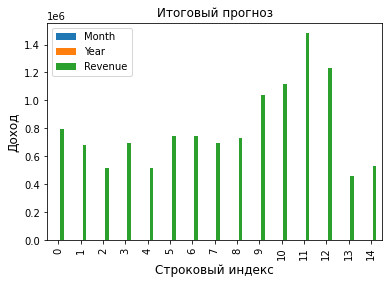

In [ ]:
df_m.plot(kind='bar')
plt.xlabel('Строковый индекс', fontsize=12)
plt.ylabel('Доход', fontsize=12)
plt.title('Итоговый прогноз', fontsize=12)
plt.show()

По итогам предсказания мы видим резкий спад продаж на 01.2012 и 02.2012
Пик продаж приходится в период с 10.2011 по 12.2011
Ожидаемо что в приддверии Нового Года данные сервисы пользуются большой популярность для поиска и покупкой подарков. Так как есть трафик из-за рубежа предполагаем что люди закупаются зараннее чтоб успеть к празднику